In [1]:
import numpy as np
from random import randint, random, choice
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
class Board(object):
    def __init__(self, num_players, rewards):
        self.n_players = num_players
        self.rewards = rewards
        self.grid = [[0 for i in range(16)] for j in range(16)]
        self.cur_turn = randint(1, num_players)
        self.last_moved = [None, None]
        self.starting_positions = {}
        if self.n_players == 2: 
            self.starting_positions[1] = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [4, 0], [4, 1]] 
            self.starting_positions[2] = [[15, 11], [15, 12], [15, 13], [15, 14], [15, 15], [14, 11], [14, 12], [14, 13], [14, 14], [14, 15], [13, 12], [13, 13], [13, 14], [13, 15], [12, 13], [12, 14], [12, 15], [11, 14], [11, 15]] 
    
    def printBoard(self):
        for r in self.grid:
            print r
            
    def reset(self):
        self.grid = [[0 for i in range(16)] for j in range(16)]
        if self.n_players == 2: 
            for player, lst in self.starting_positions.items():
                 for x, y in lst:
                        self.grid[x][y] = player
            
    def checkWin(self, player):
        if self.n_players == 2:
            win_positions = self.starting_positions[self.n_players - player + 1]
            
            for x, y in win_positions:
                if self.grid[x][y] != player:
                    return False
            return True
                        
    def inBounds(self, i, j):
        if i < 0 or j < 0 or j > 15 or i > 15:
            return False
        return True
            
    def getLegal(self, i, j):
        legal = {"moves": [], "jumps": []}
        if self.grid[i][j] == 0:
            return legal
        else:            
            for k in range(-1, 2):
                for l in range(-1, 2):
                    if self.inBounds(i + k, j + l) and self.grid[i + k][j + l] == 0:
                        legal["moves"].append([i + k, j + l])
                    else: 
                        if self.inBounds(i + 2*k, j + 2*l) and self.grid[i + 2*k][j + 2*l] == 0:
                            legal["jumps"].append([i + 2*k, j + 2*l]) 
            return legal
            
    def checkLegal(self, player, i, j, k, l):
        if self.grid[k][l] != 0 or self.grid[i][j] != player:
#             print("You can't do that move")
#             print "Here's why. Grid at k, l isn't 0?:", k, l, self.grid[k][l], "Or at i, j, isn't player", i, j, self.grid[j][j]
            return False
        else:
            legal = self.getLegal(i, j)
            if [k, l] not in legal["moves"] and [k, l] not in legal["jumps"]:
                if random() < .01:
                    print("Not legal move")
                    print i, j, k, l, legal
                return False
            return True
            
    def move(self, player, i, j, k, l, pBoard = False):
        if self.checkLegal(player, i, j, k, l) == True:
            self.grid[i][j] = 0
            self.grid[k][l] = player
            self.last_moved = [k, l]
            if pBoard:
                self.printBoard()        

In [3]:
board = Board(2, 0)
board.reset()
board.getLegal(0, 4)
print board.checkWin(1)
print board.checkWin(2)

False
False


In [4]:
board.move(1, 0, 4, 0, 5, True)

[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]


In [5]:
class Agent(object):
    def __init__(self, board, ID, baseOrigin):
        self.ID = ID
        self.baseOrigin = baseOrigin
        self.board = board
        self.pieces = self.board.starting_positions[self.ID]
        self.overrideDist = False
    
    def updateBoard(self, board):
        self.board = board
    
    def findPieces(self, board):
        pieces = []
        for i in range(len(board.grid)):
            for j in range(len(board.grid[i])):
                if board.grid[i][j] == self.ID:
                    pieces.append([i, j])
        return pieces
        
    def bestMove(self, mustJump = [], eps = .2):
        if mustJump:
            piece = mustJump
            moves = self.board.getLegal(piece[0], piece[1])
            #If you find a jump as a legal move, store this move and break
            for jp in moves["jumps"]:
                if self.distToOther(jp) < self.distToOther(piece):
                    i, j = piece
                    k, l = jp
                    return [(i, j, k, l), [k, l]]
            return [False, False]
        
        found, found2, found3 = False, False, False
        
        if self.overrideDist:
            s = self.board.starting_positions[self.board.n_players-self.ID+1]
            missedPieces = [x for x in self.pieces if x not in s]
            missedPos = [x for x in s if x not in self.pieces]
            if not missedPos:
                return [False, False]
            mp = missedPos[0]
            
            distPieces = [(self.distToOther(piece, mp), piece) for piece in missedPieces]
            for dist, piece in distPieces:
                i, j = piece
                moves = self.board.getLegal(i, j)
                # For each move in legal moves, if the move's distance is shorter than 
                # current position, store moves and break
                found2 = False
                for sm in moves["moves"]:
                    if self.distToOther(sm, mp) < self.distToOther(piece, mp):
                        found2 = True
                        break
                if found2:                    
                    break
            # Create sorted moves by distance
            sortedMoves = ([(self.distToOther(move, mp), move) for move in moves["moves"]])
            sortedMoves.sort()
            if sortedMoves:
                k, l = sortedMoves[0][1]
                jumped = []
        else:
            # Sort all the pieces that we have by distance to opposing camp in reverse (so furthest first)
            distPieces = [(self.distToOther(piece), piece) for piece in self.pieces]
            distPieces.sort(reverse=True)
            #Iterate through these
            for dist, piece in distPieces:
                # For furthest piece, get its legal moves
                i, j = piece
                moves = self.board.getLegal(i, j)
                found = False
                #If you find a jump as a legal move, store this move and break
                for jp in moves["jumps"]:
                    if self.distToOther(jp) < self.distToOther(piece):
                        found = True
                        break
                if found:
                    break

            #If the loop terminates with no jumps, and we don't have to make a jump
            # Iterate through and find normal moves
            if not found and (not mustJump):
                #Again iterate through pieces and distances
                for dist, piece in distPieces:
                    i, j = piece
                    moves = self.board.getLegal(i, j)
                    # For each move in legal moves, if the move's distance is shorter than 
                    # current position, store moves and break
                    found2 = False
                    for sm in moves["moves"]:
                        if self.distToOther(sm) < self.distToOther(piece):
                            found2 = True
                            break
                    if found2:                    
                        break
        
            # "i, j" is now the furthest moveable piece and "moves" are its moves
            # Create a sorted jumps list of jumps and their distances sorted by shortest first
            sortedJumps = ([(self.distToOther(move), move) for move in moves["jumps"]])
            sortedJumps.sort()
            k, l = 0, 0
            jumped = []

            # If we have any jumps to make at all
            if sortedJumps and found:
                k, l = sortedJumps[0][1]
                jumped = [k, l]

            else:
                if not mustJump:
                    for dist, piece in distPieces:
                        i, j = piece
                        moves = self.board.getLegal(i, j)
                        found3 = False
                        for sm in moves["moves"]:
                            if self.distToOther(sm) < self.distToOther(piece):
                                found3 = True
                                break
                        if found3:
                            break
                else:
                    return [False, False]

                # Create sorted moves by distance
                sortedMoves = ([(self.distToOther(move), move) for move in moves["moves"]])
                sortedMoves.sort()
                if sortedMoves:
                    if eps < random():
                        k, l = choice(sortedMoves)[1]
                    else:
                        k, l = sortedMoves[0][1]
        
        # If this terminates and still nothing, there are no moves we can make at all so return all False       
        if not found and (not found2):
            return [False, False]

        return [(i, j, k, l), jumped]
    
    def distToOther(self, piece, other = None):
        if not other:
            other = self.baseOrigin
        baseX, baseY = other
        pieceX, pieceY = piece
        return ((baseY - pieceY)**2 + (baseX-pieceX)**2)**.5
    
    def move(self):
        move, jumped = self.bestMove()
        if not move:
            self.overrideDist = True
            move, jumped = self.bestMove()
            if not move:
                return False
        i, j, k, l = move
        self.board.move(self.ID, i, j, k, l)
        self.pieces = self.findPieces(self.board)
        while jumped:
            move, jumped = self.bestMove(mustJump = jumped)
            if move:
                i, j, k, l = move
                board.move(self.ID, i, j, k, l)
                self.pieces = self.findPieces(self.board)
        return move
        

In [6]:
moveRew = -1
winRew = 100
def PlayGame(nplayers = 2):
    brd = Board(nplayers, 0)
    brd.reset()
    origins = [[0, 0], [15, 15]]
    players = [Agent(brd, i, origins[1-(i-1)]) for i in range(1, nplayers+1)]
    rewards = {1: [], 2: []}
    m, m1 = 0, 0
    c = 0
    while True:
        for p in players:
            # Check if game is ended
            if brd.checkWin(p.ID):
                rewards[p.ID].append(winRew)
                return p, rewards
            m = p.move()
            rewards[p.ID].append(moveRew)
            brd = p.board
        c+=1

In [7]:
lol = PlayGame()

In [487]:
plays = 100

In [488]:
wins = {1: 0, 2: 0}
rews = {1: [], 2: []}
for i in range(plays):
    p, r = PlayGame()
    wins[p.ID] += 1
    rews[1].append(np.sum(r[1]))
    rews[2].append(np.sum(r[2]))
cumrews = {1: np.cumsum(rews[1]), 2: np.cumsum(rews[2])}

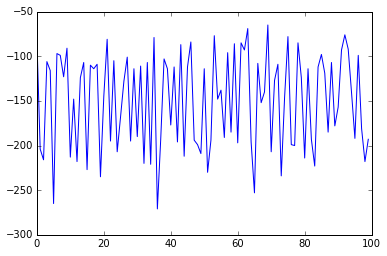

In [489]:
x = np.arange(0, plays, 1)
y = map(lambda x: rews[1][x], x)

plt.plot(x, y)

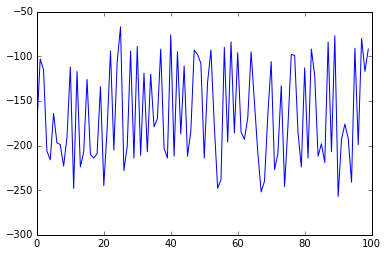

In [490]:
x = np.arange(0, plays, 1)
y = map(lambda x: rews[2][x], x)

plt.plot(x, y)

In [349]:
board.printBoard()

[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [145]:
board.printBoard()

[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


In [27]:
class HalmaState:
    """ A state of the game of Halma
    """
    def __init__(self, players = 2, rewards = 0):
        self.nplayers = 2
        self.rewards = 0
        self.playerJustMoved = 1 # At the root pretend the player just moved is p2 - p1 has the first move
        self.board = Board(players, rewards)
        self.board.reset()
        self.size = len(self.board.grid)

    def Clone(self):
        """ Create a deep clone of this game state.
        """
        st = HalmaState()
        st.playerJustMoved = self.playerJustMoved
        st.board.grid = [self.board.grid[i][:] for i in range(len(self.board.grid))]
        return st

    def DoMove(self, move):
        """ Update a state by carrying out the given move.
            Must update playerToMove.
        """
        i, j, k, l = move
        self.board.move(self.playerJustMoved, i, j, k, l)
        self.playerJustMoved = 3 - self.playerJustMoved
    
    def GetMoves(self):
        """ Get all possible moves from this state.
        """
        moves = {"moves": [], "jumps": []}
        for i in range(len(self.board.grid)):
            for j in range(len(self.board.grid)):
                if self.board.grid[i][j] == self.playerJustMoved:
                    legals = self.board.getLegal(i, j)
                    if legals["moves"]:
                        moves["moves"] += ([[i, j, k, l] for k, l in legals["moves"]])
                    if legals["jumps"]:
                        moves["jumps"] += ([[i, j, k, l] for k, l in legals["jumps"]])
        return moves
    
    def GetResult(self, player):
        """ Get the game result from the viewpoint of playerjm. 
        """
        return self.board.checkWin(player)

    def __repr__(self):
        s= ""
        for x in range(len(self.board.grid)):
            for y in range(len(self.board.grid[x])):
                s += ".XO"[self.board.grid[x][y]]
            s += "\n"
        return s

class Node:
    """ A node in the game tree. Note wins is always from the viewpoint of playerJustMoved.
        Crashes if state not specified.
    """
    def __init__(self, move = None, moveType = None, parent = None, state = None):
        self.move = move # the move that got us to this node - "None" for the root node
        self.moveType = moveType
        self.parentNode = parent # "None" for the root node
        self.childNodes = []
        self.wins = 0
        self.visits = 0
        self.untriedMoves = state.GetMoves() # future child nodes
        self.playerJustMoved = state.playerJustMoved # the only part of the state that the Node needs later
        
    def UCTSelectChild(self):
        """ Use the UCB1 formula to select a child node. Often a constant UCTK is applied so we have
            lambda c: c.wins/c.visits + UCTK * sqrt(2*log(self.visits)/c.visits to vary the amount of
            exploration versus exploitation.
        """
        s = sorted(self.childNodes, key = lambda c: c.wins/c.visits + sqrt(2*log(self.visits)/c.visits))[-1]
        return s
    
    def AddChild(self, m, s, moveType = "moves"):
        """ Remove m from untriedMoves and add a new child node for this move.
            Return the added child node
        """
        n = Node(move = m, moveType = moveType, parent = self, state = s)
        self.untriedMoves[moveType].remove(m)
        self.childNodes.append(n)
        return n
    
    def Update(self, result):
        """ Update this node - one additional visit and result additional wins. result must be from the viewpoint of playerJustmoved.
        """
        self.visits += 1
        self.wins += result

    def __repr__(self):
        return "[M:" + str(self.move) + " MT:" + str(self.moveType) + " W/V:" + str(self.wins) + "/" + str(self.visits) + " U:" + str(self.untriedMoves) + "]"

    def TreeToString(self, indent):
        s = self.IndentString(indent) + str(self)
        for c in self.childNodes:
             s += c.TreeToString(indent+1)
        return s

    def IndentString(self,indent):
        s = "\n"
        for i in range (1,indent+1):
            s += "| "
        return s

    def ChildrenToString(self):
        s = ""
        for c in self.childNodes:
             s += str(c) + "\n"
        return s


def UCT(rootstate, itermax, verbose = False):
    """ Conduct a UCT search for itermax iterations starting from rootstate.
        Return the best move from the rootstate.
        Assumes 2 alternating players (player 1 starts), with game results in the range [0.0, 1.0]."""

    rootnode = Node(state = rootstate)

    for i in range(itermax):
        node = rootnode
        state = rootstate.Clone()

        # Select
        while not node.untriedMoves["moves"] and not node.untriedMoves["jumps"] and node.childNodes != []: # node is fully expanded and non-terminal
            node = node.UCTSelectChild()
            state.DoMove(node.move)

        # Expand
        if node.untriedMoves["moves"] or node.untriedMoves["jumps"]: # if we can expand (i.e. state/node is non-terminal)
            m = choice(node.untriedMoves["moves"] + node.untriedMoves["jumps"])
            state.DoMove(m)
            mt = "moves"
            if m in node.untriedMoves["jumps"]:
                mt = "jumps"
            node = node.AddChild(m, state, mt) # add child and descend tree
        
        mvs = state.GetMoves()
        # Rollout - this can often be made orders of magnitude quicker using a state.GetRandomMove() function
        while mvs["moves"] or mvs["jumps"]: # while state is non-terminal
            state.DoMove(choice(mvs["moves"] + mvs["jumps"]))

        # Backpropagate
        while node != None: # backpropagate from the expanded node and work back to the root node
            node.Update(state.GetResult(node.playerJustMoved)) # state is terminal. Update node with result from POV of node.playerJustMoved
            node = node.parentNode

    # Output some information about the tree - can be omitted
    if (verbose): print rootnode.TreeToString(0)
    else: print rootnode.ChildrenToString()

    return sorted(rootnode.childNodes, key = lambda c: c.visits)[-1].move # return the move that was most visited
                
def UCTPlayGame():
    """ Play a sample game between two UCT players where each player gets a different number 
        of UCT iterations (= simulations = tree nodes).
    """
    state = HalmaState()
    while (state.GetMoves() != []):
        print str(state)
        if state.playerJustMoved == 1:
            m = UCT(rootstate = state, itermax = 10, verbose = False) # play with values for itermax and verbose = True
        else:
            m = UCT(rootstate = state, itermax = 10, verbose = False)
        print "Best Move: " + str(m) + "\n"
        state.DoMove(m)
    if state.GetResult(state.playerJustMoved):
        print "Player " + str(state.playerJustMoved) + " wins!"
    else:
        print "Player " + str(3 - state.playerJustMoved) + " wins!"

In [28]:
UCTPlayGame()

XXXXX...........
XXXXX...........
XXXX............
XXX.............
XX..............
................
................
................
................
................
................
..............OO
.............OOO
............OOOO
...........OOOOO
...........OOOOO

Not legal move
12 15 10 13 {'jumps': [], 'moves': [[11, 14], [11, 15], [12, 14]]}
Not legal move
12 15 10 13 {'jumps': [], 'moves': [[11, 14], [11, 15], [12, 14]]}
Not legal move
15 12 13 10 {'jumps': [[13, 12]], 'moves': [[14, 11], [15, 11], [15, 13]]}
Not legal move
12 15 10 13 {'jumps': [], 'moves': [[11, 14], [11, 15], [12, 14]]}
Not legal move
15 12 13 10 {'jumps': [[13, 12]], 'moves': [[14, 11], [15, 11], [15, 13]]}
Not legal move
15 12 13 10 {'jumps': [[13, 12]], 'moves': [[14, 11], [15, 11], [15, 13]]}
Not legal move
15 12 13 10 {'jumps': [[13, 12]], 'moves': [[14, 11], [15, 11], [15, 13]]}
Not legal move
12 15 10 13 {'jumps': [], 'moves': [[11, 14], [11, 15], [12, 14]]}
Not legal move
12 15 10 13 {'jumps': []

KeyboardInterrupt: 